In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df=pd.read_excel("Titanic.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,Allen Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis MO
1,1,1,Allison Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal PQ / Chesterville ON
2,1,0,Allison Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal PQ / Chesterville ON
3,1,0,Allison Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal PQ / Chesterville ON
4,1,0,Allison Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal PQ / Chesterville ON


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home_dest'],
      dtype='object')

In [7]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64

#DATA CLEANING

In [8]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
df = df.drop(['cabin'], axis = 1)
#we'll drop the boat feature since not a lot more useful information can be extracted from it.
df = df.drop(['boat'], axis = 1)
#we'll  drop the body feature since not a lot more useful information can be extracted from it.
df = df.drop(['body'], axis = 1)
#we'll  drop the home_dest feature since not a lot more useful information can be extracted from it.
df = df.drop(['home_dest'], axis = 1)
#we'll  drop the ticket feature since it's unlikely to yield any useful information
df = df.drop(['ticket'], axis = 1)

#DATA VISUALIZATION

Percentage of females who survived: 72.74678111587983
Percentage of males who survived: 19.098457888493474


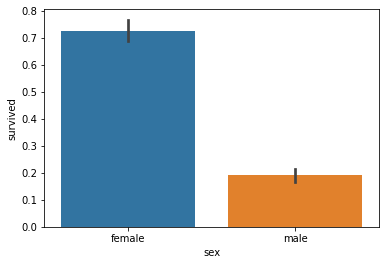

In [9]:
#draw a bar plot of survival by sex
sns.barplot(x="sex", y="survived", data=df)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["survived"][df["sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["survived"][df["sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 61.91950464396285
Percentage of Pclass = 2 who survived: 42.96028880866426
Percentage of Pclass = 3 who survived: 25.52891396332863


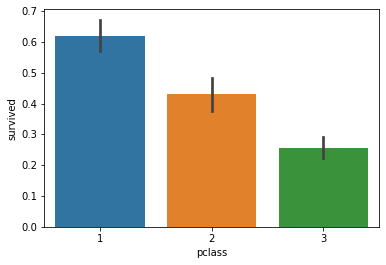

In [10]:
#draw a bar plot of survival by Pclass
sns.barplot(x="pclass", y="survived", data=df)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["survived"][df["pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["survived"][df["pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["survived"][df["pclass"] == 3].value_counts(normalize = True)[1]*100)

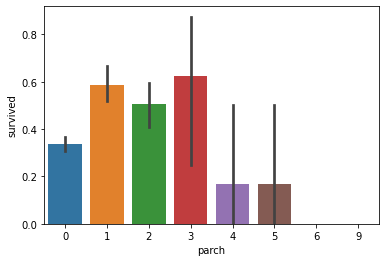

In [11]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="parch", y="survived", data=df)
plt.show()

In [12]:
#df.age.unique()
import numpy as np
#sort the ages into logical categories
df["age"] = df["age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["age"], bins, labels = labels)
df.sample(2)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,AgeGroup
1073,3,0,O'Connor Mr. Maurice,male,-0.5,0,0,7.7500,Q,Unknown
1201,3,0,Sirayanian Mr. Orsen,male,22.0,0,0,7.2292,C,Student


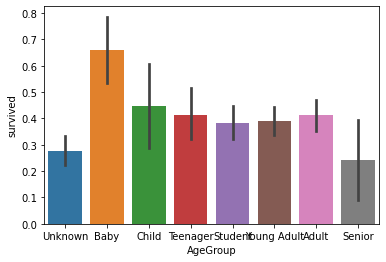

In [13]:
#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="survived", data=df)
plt.show()

In [14]:
#map each Age value to a numerical value
age_mapping = {'Unknown':0,'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
df['AgeGroup'] = df['AgeGroup'].map(age_mapping)
df = df.drop(['age'], axis = 1)

In [15]:
#Embarked feature
df.embarked.unique()
#Filling embarked feature 
df.embarked.value_counts()
df = df.fillna({"embarked": "S"})

In [16]:
#Name Feature
df['Title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)
df.Title.unique()
df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [17]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)
df=df.drop(['name'], axis = 1)

In [18]:
#SexFeature
gender_mapping = {"male": 0, "female": 1}
df['Sex'] = df['sex'].map(gender_mapping)
df=df.drop(['sex'],axis=1)

In [19]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['embarked'].map(embarked_mapping)
df=df.drop(['embarked'],axis=1)

In [20]:
#Fare feature
mean_value=df['fare'].mean()
df['fare'].fillna(value=mean_value, inplace=True)

In [21]:
df['FareBand'] = pd.qcut(df['fare'], 4, labels = [1, 2, 3, 4])
df=df.drop(['fare'],axis=1)

In [22]:
#Title type
df.Title.dtype
df['Title']=df['Title'].astype(int)

In [23]:
df.head(10)

,pclass,survived,sibsp,parch,AgeGroup,Title,Sex,Embarked,FareBand
0,1,1,0,0,5,2,1,1,4
1,1,1,1,2,1,4,0,1,4
2,1,0,1,2,1,2,1,1,4
3,1,0,1,2,5,1,0,1,4
4,1,0,1,2,5,3,1,1,4
5,1,1,0,0,6,1,0,1,3
6,1,1,1,0,7,2,1,1,4
7,1,0,0,0,6,1,0,1,1
8,1,1,2,0,6,3,1,1,4
9,1,0,0,0,7,1,0,2,4


Now our data is clean and we will now ready to do further process

# Create Model

In [24]:
from sklearn.model_selection import train_test_split

predictors = df.drop(['survived'], axis=1)
target = df["survived"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print( y_test.shape)


(1047, 8)
(1047,)
(262, 8)
(262,)


**Optimizer='ADAM',Loss='mae", epochs=10**

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=[8]),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
     metrics=['accuracy'])
model.fit(x_train, y_train,validation_data=(x_test, y_test),
 epochs=10)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

ImportError: cannot import name 'keras' from 'tensorflow' (unknown location)

After 10 epochs we can see the train accuracy as 81.66% and val_accuracy as 81.3%
our model is working best with the mae loss and ADAM optimizer.

**Optimizer='ADAM',Loss='mse", epochs=10**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=[8]),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mse',
     metrics=['accuracy'])
model.fit(x_train, y_train,validation_data=(x_test, y_test),
 epochs=10)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

After 10 epochs we can see the train accuracy as 81.85% and val_accuracy as 80.5%
our model is working best with the mae loss and ADAM optimizer.Compared to mae loss in mse loss compilation we can observe the increse in train accuracy and small drop in validation acuracy.

**loss='binary_crossentropy', optimizer='adam' and epochs =10**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

accuracies = []

for i in range(5):
    tf.random.set_seed(i)
    
    model = Sequential()
    model.add(Dense(6, input_dim=8, activation='relu'))
    # model.add(Dropout(.2))
    model.add(Dense(4, activation='relu'))
    # model.add(Dropout(.2))
    model.add(Dense(1, activation='sigmoid'))
   
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(x_test, y_test)
    accuracies.append(accuracy*100)
    
sum(accuracies)/len(accuracies)

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

**loss='binary_crossentropy', optimizer='adam' and epochs =100**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

accuracies = []

for i in range(5):
    tf.random.set_seed(i)
    
    model = Sequential()
    model.add(Dense(6, input_dim=8, activation='relu'))
    # model.add(Dropout(.2))
    model.add(Dense(4, activation='relu'))
    # model.add(Dropout(.2))
    model.add(Dense(1, activation='sigmoid'))
   
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(x_test, y_test)
    accuracies.append(accuracy*100)
    
sum(accuracies)/len(accuracies)


from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

**When we increase epochs the accuracy increased from 66% to 80%.Hmm great improvement**(Note:Everytie it varies when we run)

**OPTIMIZER=SGD***(epochs = 50,learning_rate = 0.1)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# create model
model = Sequential()
model.add(Dense(52, input_shape=(8,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

**********Interestingly after using the SGD Optimizer the train and test accuracies are approximatelysimilar************

**2.OPTIMIZER=SGD***(epochs = 50,learning_rate = 0.001)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# create model
model = Sequential()
model.add(Dense(52, input_shape=(8,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
epochs = 50
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

*** we reduced the learning rate to very small(0.001)the accuracy of both train and test has been reduced***

***CONCLUSION***

Here we created deep learning model using both Gradient descent and ADAM optimizers with different hyperparameter values.The following inference has been obtained:

The best optimizer for this Titanic data set would be the **SGD** and the **learning rate is 0.1** with only **50 epochs** we obtained the** 81% accuracy** both in train and test data set.